# Analysis using Python

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from bs4.element import Tag
%matplotlib inline
import matplotlib.pyplot as plt

f = open('JoSAA.html', 'r')
lines = f.read()
f.close()

soup = BeautifulSoup(lines, 'html.parser')
table = soup.find('table')
tableRows = table.find_all('tr')
headingRow: Tag
headingRow = tableRows[0]
tableRows.pop(0)
headingData = headingRow.find_all('th')

headings = []
i: Tag
for i in headingData:
    headings.append(i.get_text())

data = []
for i in tableRows:
    contentData = i.find_all('td')

    contents = []
    x: Tag
    for x in contentData:
        contents.append(x.get_text().replace('\n', '').strip())
    data.append(contents)

## Convert to Data Frame

In [2]:
output = pd.DataFrame(data,columns=headings)
# output.to_excel('josaa-cutoff.xlsx',index=False)
output.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8471,12396
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16998,21029
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1603,1760
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3536,3536
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,3044,4260


### Simple count analysis
- Number of different Institutes
- Number of different Academic Programs

In [3]:
output.shape, pd.DataFrame(output['Institute'].value_counts()).shape, pd.DataFrame(output['Academic Program Name'].value_counts()).shape

((9178, 7), (114, 1), (169, 1))

### Discarding unknown type data

In [4]:
# I don't know what the hell is 687P rank
# or any other ranks ending with 'P'
# So will be dropping the same!
output[output['Opening Rank']=='687P']

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
16,Indian Institute of Technology Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,AI,SC,Female-only (including Supernumerary),687P,687P


In [5]:
output = output[output['Opening Rank'].apply(lambda x: str(x).isdigit())]
output = output[output['Closing Rank'].apply(lambda x: str(x).isdigit())]
output = output.reset_index(drop=True)
output['Opening Rank'] = output['Opening Rank'].astype(int)
output['Closing Rank'] = output['Closing Rank'].astype(int)
output.dtypes

Institute                object
Academic Program Name    object
Quota                    object
Seat Type                object
Gender                   object
Opening Rank              int32
Closing Rank              int32
dtype: object

In [6]:
# Preview of workable data
output.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8471,12396
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16998,21029
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1603,1760
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3536,3536
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,3044,4260


# Cut-Offs in order of closing rank

## All categories

In [7]:
sort_by_closing_rank = output.sort_values(by=['Closing Rank'])
sort_by_closing_rank.to_excel('./outputs/sort_by_closing_rank.xlsx',index=False)
sort_by_closing_rank.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
175,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,SC (PwD),Gender-Neutral,1,1
178,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,ST (PwD),Gender-Neutral,1,1
172,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,OBC-NCL (PwD),Gender-Neutral,1,2
3340,National Institute of Technology Calicut,"Architecture (5 Years, Bachelor of Architecture)",HS,OPEN (PwD),Gender-Neutral,2,2
388,Indian Institute of Technology Delhi,"Computer Science and Engineering (4 Years, Bac...",AI,EWS (PwD),Gender-Neutral,2,2


# General Categories

In [8]:
sort_by_closing_rank_general = sort_by_closing_rank[sort_by_closing_rank['Seat Type']=='OPEN']
sort_by_closing_rank_general.to_excel('./outputs/sort_by_closing_rank_general.xlsx')
sort_by_closing_rank_general.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
164,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,1,67
382,Indian Institute of Technology Delhi,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,3,100
1265,Indian Institute of Technology Madras,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,85,163
6930,"Visvesvaraya National Institute of Technology,...","Architecture (5 Years, Bachelor of Architecture)",HS,OPEN,Female-only (including Supernumerary),141,167
3349,National Institute of Technology Calicut,"Architecture (5 Years, Bachelor of Architecture)",OS,OPEN,Female-only (including Supernumerary),99,168


# Computer Science Trends
Computer Science and Engineering (4 Years, Bachelor of Technology)

In [9]:
computer_sci = sort_by_closing_rank[sort_by_closing_rank['Academic Program Name']=='Computer Science and Engineering (4 Years, Bachelor of Technology)']
computer_sci.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
175,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,SC (PwD),Gender-Neutral,1,1
178,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,ST (PwD),Gender-Neutral,1,1
172,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,OBC-NCL (PwD),Gender-Neutral,1,2
388,Indian Institute of Technology Delhi,"Computer Science and Engineering (4 Years, Bac...",AI,EWS (PwD),Gender-Neutral,2,2
1129,Indian Institute of Technology Kanpur,"Computer Science and Engineering (4 Years, Bac...",AI,EWS (PwD),Gender-Neutral,3,3


## Top 10 Institutes fro CSE

In [10]:
comparable = computer_sci[(computer_sci['Quota']!='HS')&(computer_sci['Gender']=='Gender-Neutral')&(computer_sci['Seat Type']=='OPEN')]
comparable.head(10)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
164,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,1,67
382,Indian Institute of Technology Delhi,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,3,100
1265,Indian Institute of Technology Madras,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,85,163
1123,Indian Institute of Technology Kanpur,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,115,216
674,Indian Institute of Technology Kharagpur,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,207,285
1509,Indian Institute of Technology Roorkee,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,32,414
932,Indian Institute of Technology Hyderabad,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,191,521
2029,Indian Institute of Technology Guwahati,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,439,600
6301,"National Institute of Technology, Tiruchirappalli","Computer Science and Engineering (4 Years, Bac...",OS,OPEN,Gender-Neutral,1,714
1855,Indian Institute of Technology (BHU) Varanasi,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,602,873


## Graphical Analysis for CSE

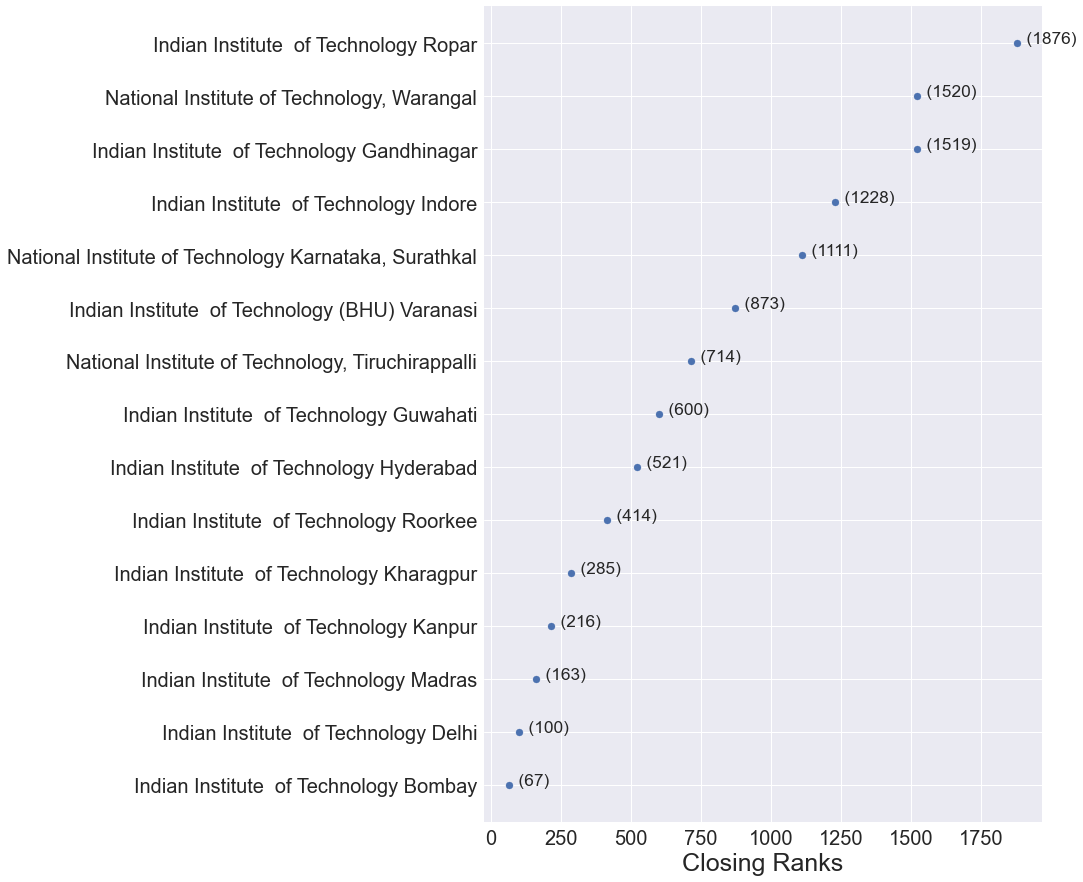

In [11]:
# Top tier
plt.style.use('seaborn')
plt.subplots(figsize=(10,15))
plt.tick_params(axis='both', which='major', labelsize=20)
computer_sci_top = comparable[(comparable['Closing Rank']<2000 )]
x = computer_sci_top['Closing Rank']
y= computer_sci_top['Institute']
plt.xlabel('Closing Ranks',fontsize=25)
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '  ({})'.format(i_x),fontsize='xx-large')
plt.scatter(x,y);
plt.savefig('./outputs/top_teir_1.png',bbox_inches='tight')

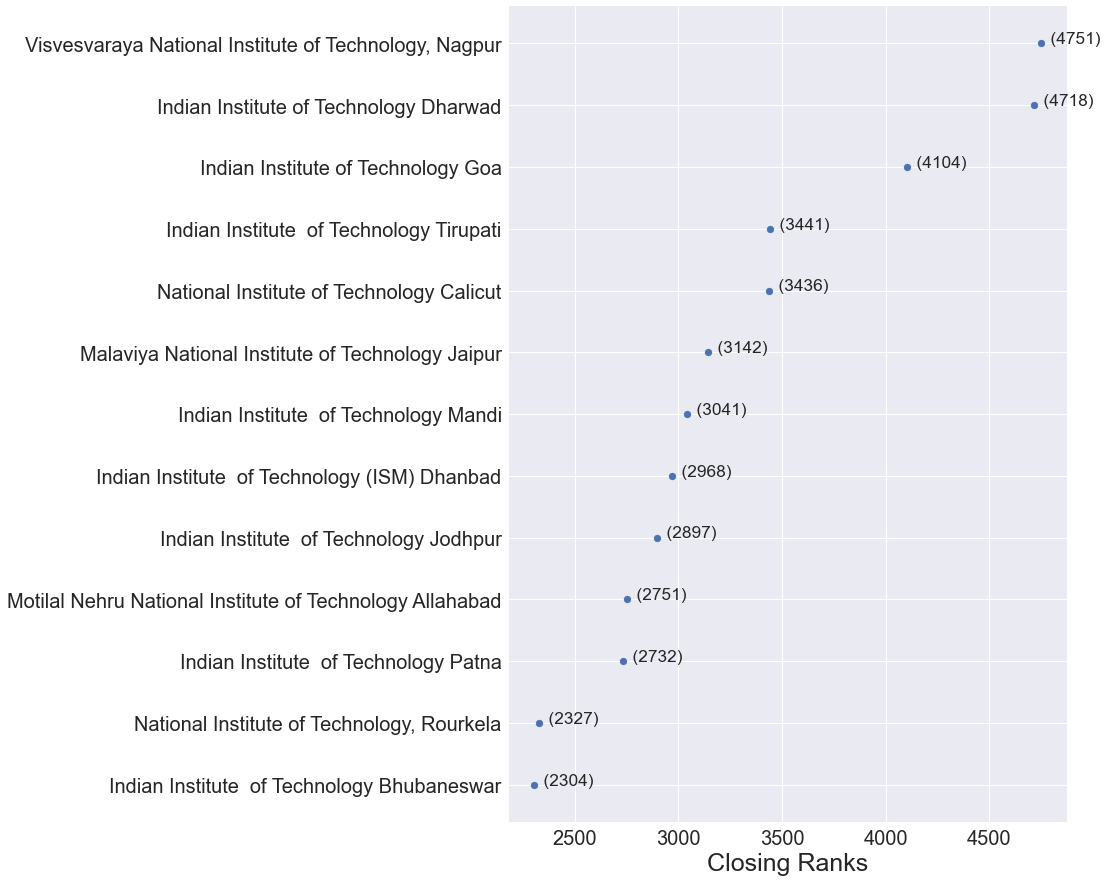

In [12]:
# Top tier 2
plt.style.use('seaborn')
plt.subplots(figsize=(10,15))
plt.tick_params(axis='both', which='major', labelsize=20)
computer_sci_top = comparable[(comparable['Closing Rank']<5000)&(comparable['Closing Rank']>2000)]
x = computer_sci_top['Closing Rank']
y= computer_sci_top['Institute']
plt.xlabel('Closing Ranks',fontsize=25)
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '  ({})'.format(i_x),fontsize='xx-large')
plt.scatter(x,y);
plt.savefig('./outputs/top_teir_2.png',bbox_inches='tight')

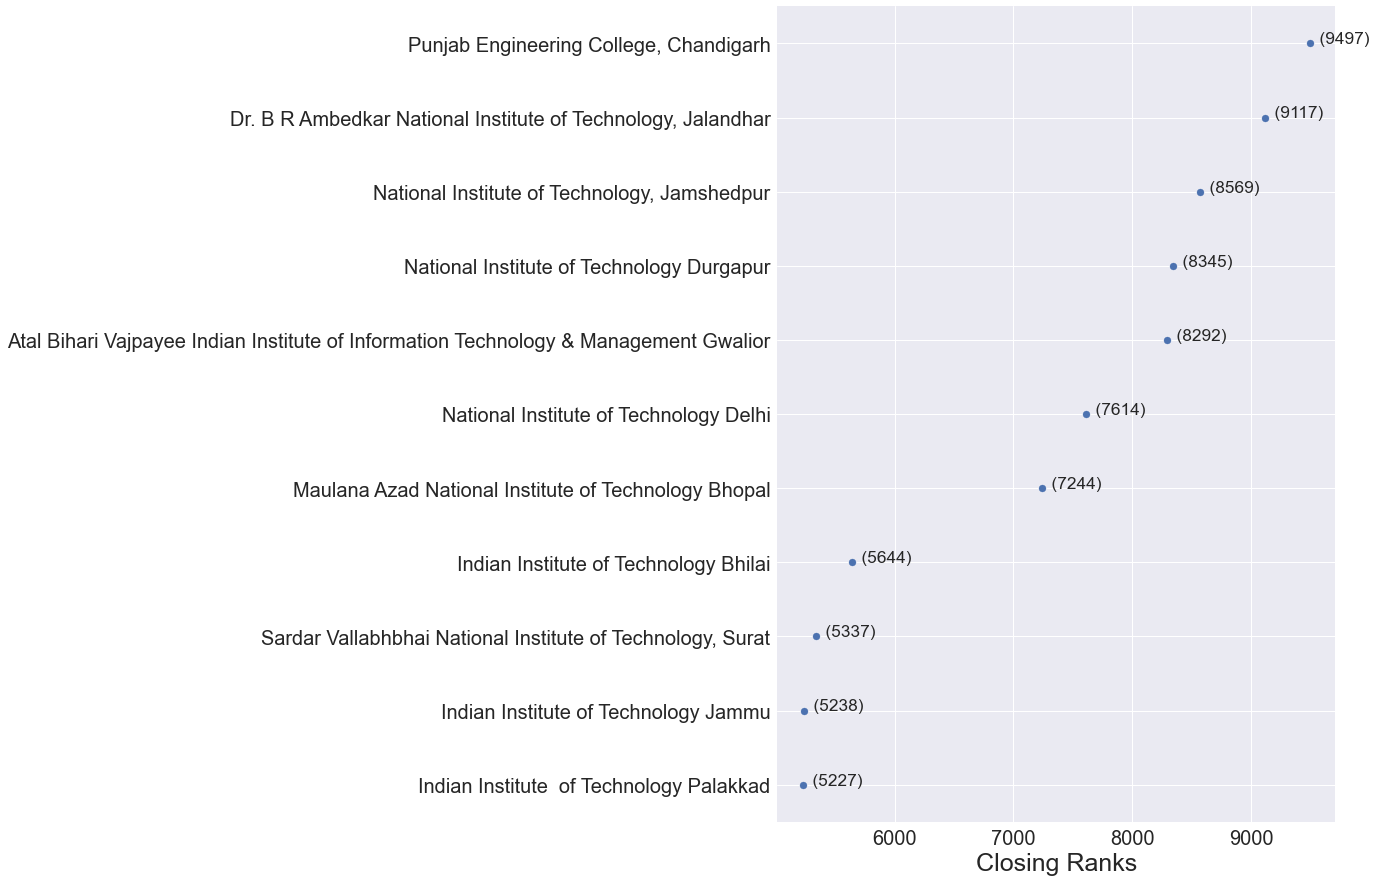

In [13]:
# Top tier 3
plt.subplots(figsize=(10,15))
plt.style.use('seaborn')
plt.tick_params(axis='both', which='major', labelsize=20)
computer_sci_top = comparable[(comparable['Closing Rank']<10000)&(comparable['Closing Rank']>5000)]
x = computer_sci_top['Closing Rank']
y= computer_sci_top['Institute']
plt.xlabel('Closing Ranks',fontsize=25)
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '  ({})'.format(i_x),fontsize='xx-large')
plt.scatter(x,y);
plt.savefig('./outputs/top_teir_3.png',bbox_inches='tight')

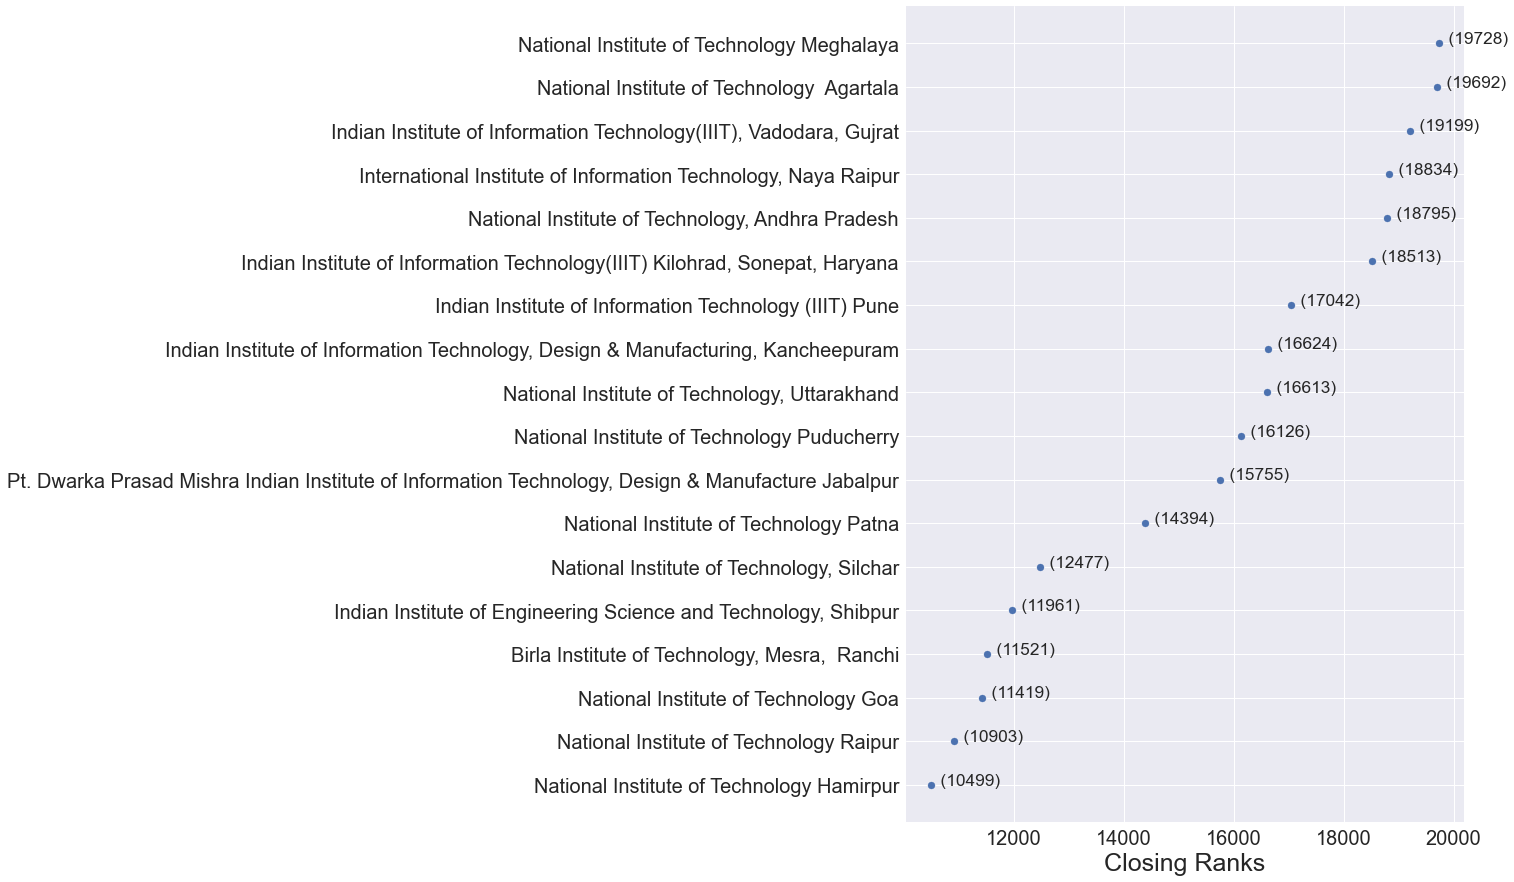

In [14]:
# Top tier 4
plt.subplots(figsize=(10,15))
plt.style.use('seaborn')
plt.tick_params(axis='both', which='major', labelsize=20)
computer_sci_top = comparable[(comparable['Closing Rank']<20000)&(comparable['Closing Rank']>10000)]
x = computer_sci_top['Closing Rank']
y= computer_sci_top['Institute']
plt.xlabel('Closing Ranks',fontsize=25)
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '  ({})'.format(i_x),fontsize='xx-large')
plt.scatter(x,y);
plt.savefig('./outputs/top_teir_4.png',bbox_inches='tight')

In [15]:
# Some more information
pd.DataFrame(data=output['Seat Type'].value_counts()), pd.DataFrame(data=output['Quota'].value_counts())

(               Seat Type
 OPEN                1838
 OBC-NCL             1666
 SC                  1626
 EWS                 1548
 ST                  1318
 OPEN (PwD)           460
 OBC-NCL (PwD)        217
 EWS (PwD)             64
 SC (PwD)              50
 ST (PwD)              23,
     Quota
 AI   3433
 OS   2774
 HS   2480
 JK     78
 GO     33
 LA     12)

## Plots for other branches

In [16]:
pd.DataFrame(data=output['Academic Program Name'].value_counts())

,Academic Program Name
"Computer Science and Engineering (4 Years, Bachelor of Technology)",1294
"Electronics and Communication Engineering (4 Years, Bachelor of Technology)",927
"Mechanical Engineering (4 Years, Bachelor of Technology)",908
"Civil Engineering (4 Years, Bachelor of Technology)",840
"Electrical Engineering (4 Years, Bachelor of Technology)",650
...,...
"Biochemical Engineering with M.Tech. in Biochemical Engineering and Biotechnology (5 Years, Bachelor and Master of Technology (Dual Degree))",5
"Bioengineering with M.Tech in Biomedical Technology (5 Years, Bachelor and Master of Technology (Dual Degree))",5
"Ceramic Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))",5
"Electronics and Communication Engineering (with Specialization of Embedded Systems and Internet of Things) (4 Years, B. Tech / B. Tech (Hons.))",5


In [17]:
# Getting and normalising data
import textwrap
branch = 'Civil Engineering (4 Years, Bachelor of Technology)'
save_name = 'Civil'
# limits = [2000,5000,10000,18000]
# limits = [5000,10000,15000,25000]
limits = [7000,10000,15000,35000]
branchData = sort_by_closing_rank[sort_by_closing_rank['Academic Program Name']==branch]
comparable = branchData[(branchData['Quota']!='HS')&(branchData['Gender']=='Gender-Neutral')&(branchData['Seat Type']=='OPEN')]
comparable = comparable.reset_index(drop=True)
temp = comparable['Institute']
comparable['Institute'] = temp.apply(lambda x: '\n'.join(textwrap.wrap(x, width=50)))

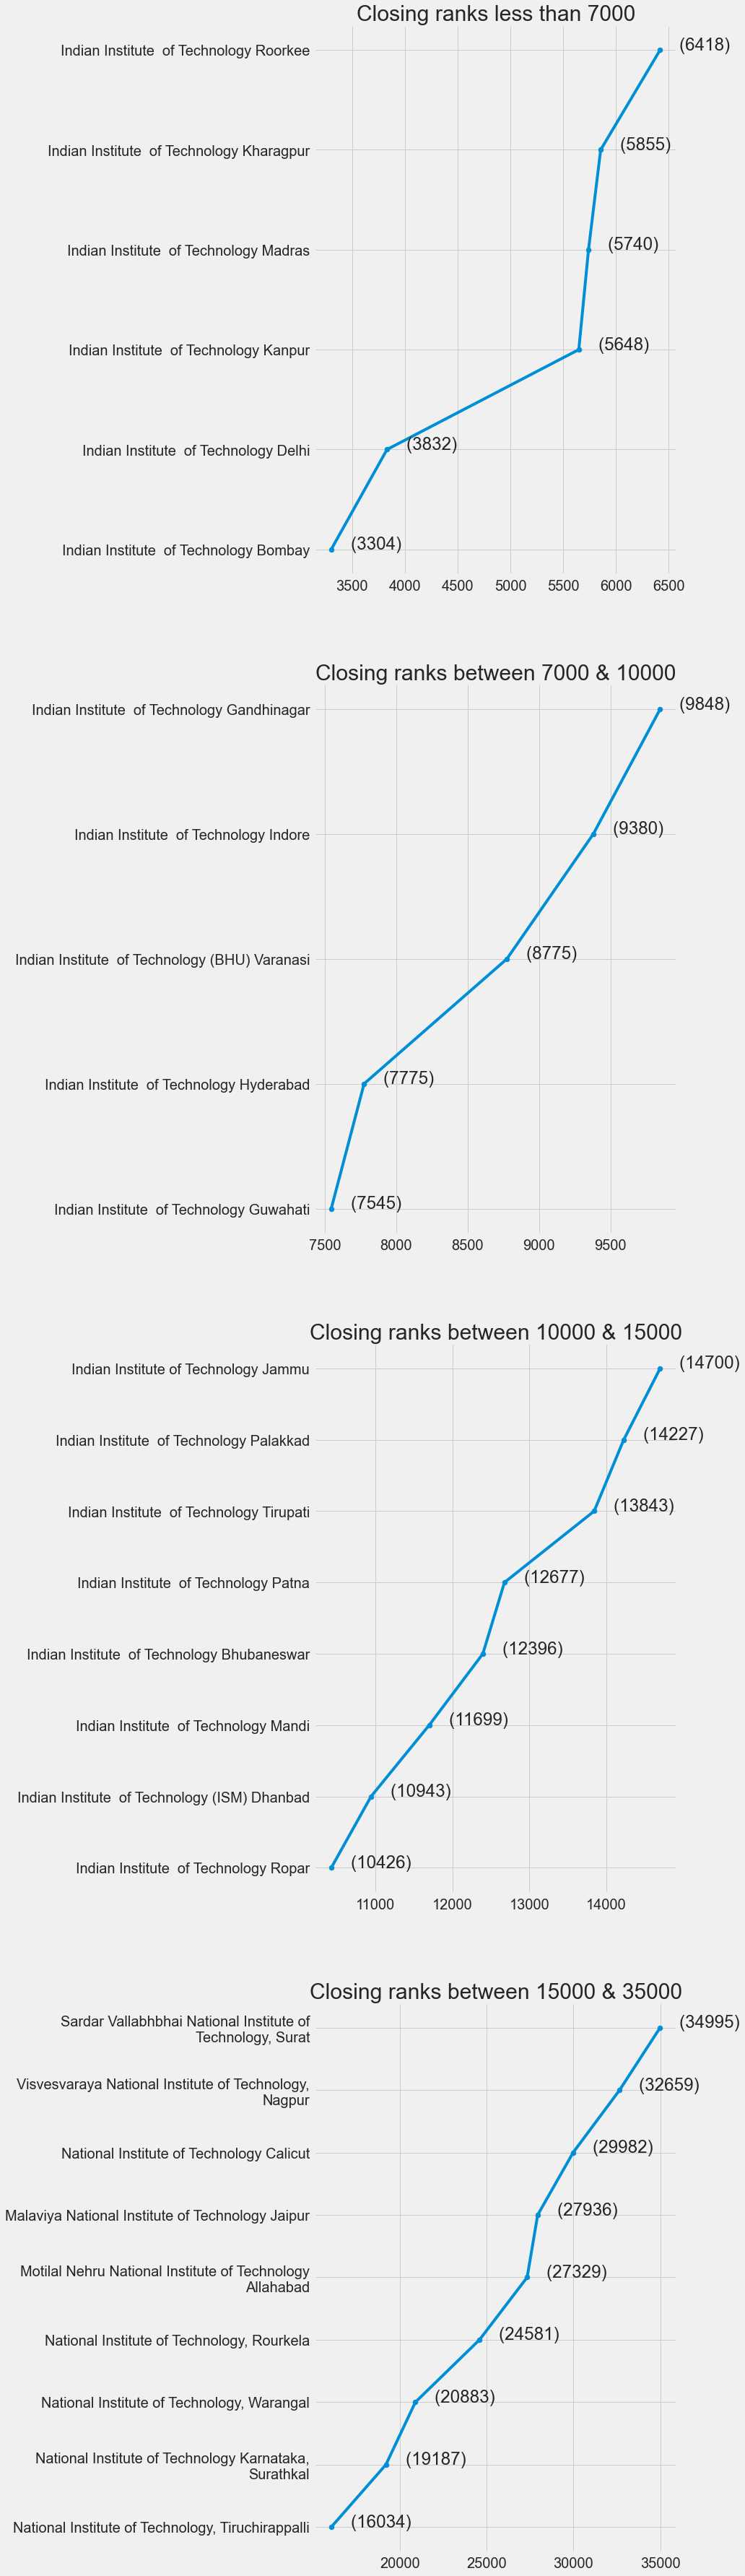

In [18]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(
nrows=4,
ncols=1,
figsize=(8,60))
for i in ax:
    i.tick_params(axis='both', which='major', labelsize=20)
ax[3].set_title(f'Closing ranks between {limits[2]} & {limits[3]}',fontsize=30)
ax[2].set_title(f'Closing ranks between {limits[1]} & {limits[2]}',fontsize=30)
ax[1].set_title(f'Closing ranks between {limits[0]} & {limits[1]}',fontsize=30)
ax[0].set_title(f'Closing ranks less than {limits[0]}',fontsize=30)
branch_top = comparable[(comparable['Closing Rank']<limits[3])&(comparable['Closing Rank']>limits[2])]
x = branch_top['Closing Rank']
y= branch_top['Institute']
ax[3].scatter(x,y)
ax[3].plot(x,y)
for i_x, i_y in zip(x, y):
    ax[3].text(i_x, i_y, '    ({})'.format(i_x),fontsize='xx-large')
branch_top = comparable[(comparable['Closing Rank']<limits[2])&(comparable['Closing Rank']>limits[1])]
x = branch_top['Closing Rank']
y= branch_top['Institute']
ax[2].scatter(x,y)
ax[2].plot(x,y)
for i_x, i_y in zip(x, y):
    ax[2].text(i_x, i_y, '    ({})'.format(i_x),fontsize='xx-large')
branch_top = comparable[(comparable['Closing Rank']<limits[1])&(comparable['Closing Rank']>limits[0])]
x = branch_top['Closing Rank']
y= branch_top['Institute']
ax[1].scatter(x,y)
ax[1].plot(x,y)
for i_x, i_y in zip(x, y):
    ax[1].text(i_x, i_y, '    ({})'.format(i_x),fontsize='xx-large')
branch_top = comparable[(comparable['Closing Rank']<limits[0])]
x = branch_top['Closing Rank']
y= branch_top['Institute']
ax[0].scatter(x,y)
ax[0].plot(x,y)
for i_x, i_y in zip(x, y):
    ax[0].text(i_x, i_y, '    ({})'.format(i_x),fontsize='xx-large')
fig.savefig(f'./outputs/top_{save_name}.png',bbox_inches='tight');